In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder



In [ ]:
mnist = fetch_openml('mnist_784', version=1)
X, y = mnist["data"], mnist["target"].astype(np.int32)


In [ ]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train = X_train.to_numpy()
X_test = X_test.to_numpy()
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)
# Reshape
X_train = X_train.reshape(-1, 28, 28)
X_test = X_test.reshape(-1, 28, 28)

# One-hot encoding
encoder = OneHotEncoder(sparse_output=False)
y_train_encoded = encoder.fit_transform(y_train.to_numpy().reshape(-1, 1))
y_test_encoded = encoder.transform(y_test.to_numpy().reshape(-1, 1))


X_train shape: (56000, 784)
y_train shape: (56000,)
X_test shape: (14000, 784)
y_test shape: (14000,)


In [ ]:
input_size = 28
hidden_size = 32
output_size = 10
epochs = 10
lr = 0.001
batch_size = 64
eps = 1e-8



In [ ]:
 #Xavier Initialization
Wxh = np.random.randn(hidden_size, input_size) * np.sqrt(1. / input_size)
Whh = np.random.randn(hidden_size, hidden_size) * np.sqrt(1. / hidden_size)
bh = np.zeros((hidden_size, 1))

Why = np.random.randn(output_size, hidden_size) * np.sqrt(1. / hidden_size)
by = np.zeros((output_size, 1))

In [ ]:
# RMSProp memory
rms = {name: np.zeros_like(param) for name, param in zip(
    ['Wxh', 'Whh', 'bh', 'Why', 'by'],
    [Wxh, Whh, bh, Why, by]
)}

In [ ]:
def softmax(x):
    exps = np.exp(x - np.max(x))
    return exps / np.sum(exps)

def tanh_deriv(x):
    return 1 - x ** 2

losses = []
accuracies = []

In [ ]:
for epoch in range(epochs):
    total_loss = 0
    correct = 0

    for i in range(0, len(X_train), batch_size):
        dWxh = np.zeros_like(Wxh)
        dWhh = np.zeros_like(Whh)
        dbh = np.zeros_like(bh)
        dWhy = np.zeros_like(Why)
        dby = np.zeros_like(by)

        for b in range(batch_size):
            idx = i + b
            if idx >= len(X_train): break
            x_seq = X_train[idx]
            y_true = y_train_encoded[idx].reshape(-1, 1)
            hs = {}
            hs[-1] = np.zeros((hidden_size, 1))

            # Forward
            for t in range(28):
                xt = x_seq[t].reshape(-1, 1)
                hs[t] = np.tanh(Wxh @ xt + Whh @ hs[t-1] + bh)
            y_pred = softmax(Why @ hs[27] + by)
            loss = -np.sum(y_true * np.log(y_pred + 1e-9))
            total_loss += loss

            if np.argmax(y_pred) == y_train.iloc[idx]:
                correct += 1

            # Backward
            dWhy += (y_pred - y_true) @ hs[27].T
            dby += (y_pred - y_true)

            dh_next = np.zeros((hidden_size, 1))
            for t in reversed(range(28)):
                xt = x_seq[t].reshape(-1, 1)
                if t == 27:
                    dh = Why.T @ (y_pred - y_true)
                else:
                    dh = dh_next
                dtanh = tanh_deriv(hs[t]) * dh
                dWxh += dtanh @ xt.T
                dWhh += dtanh @ hs[t-1].T
                dbh += dtanh
                dh_next = Whh.T @ dtanh

        # Average gradients
        for grad in [dWxh, dWhh, dbh, dWhy, dby]:
            grad /= batch_size

        # RMSProp update
        for name, grad, param in zip(['Wxh', 'Whh', 'bh', 'Why', 'by'],
                                     [dWxh, dWhh, dbh, dWhy, dby],
                                     [Wxh, Whh, bh, Why, by]):
            rms[name] = 0.9 * rms[name] + 0.1 * grad**2
            param -= lr * grad / (np.sqrt(rms[name]) + eps)

    acc = correct / len(X_train)
    losses.append(total_loss / len(X_train))
    accuracies.append(acc)
    print(f"Epoch {epoch+1}/{epochs} | Loss: {losses[-1]:.4f} | Accuracy: {acc*100:.2f}%")


Epoch 1/10 | Loss: 1.5988 | Accuracy: 42.34%
Epoch 2/10 | Loss: 1.3556 | Accuracy: 49.32%
Epoch 3/10 | Loss: 1.3222 | Accuracy: 50.14%
Epoch 4/10 | Loss: 1.3010 | Accuracy: 50.61%
Epoch 5/10 | Loss: 1.2833 | Accuracy: 51.08%
Epoch 6/10 | Loss: 1.2711 | Accuracy: 51.38%
Epoch 7/10 | Loss: 1.2652 | Accuracy: 51.63%
Epoch 8/10 | Loss: 1.2583 | Accuracy: 51.74%
Epoch 9/10 | Loss: 1.2530 | Accuracy: 51.93%
Epoch 10/10 | Loss: 1.2461 | Accuracy: 52.31%


In [ ]:
for epoch in range(epochs):
    total_loss = 0
    correct = 0

    for i in range(0, len(X_train), batch_size):
        dWxh = np.zeros_like(Wxh)
        dWhh = np.zeros_like(Whh)
        dbh = np.zeros_like(bh)
        dWhy = np.zeros_like(Why)
        dby = np.zeros_like(by)

        for b in range(batch_size):
            idx = i + b
            if idx >= len(X_train): break
            x_seq = X_train[idx]
            y_true = y_train_encoded[idx].reshape(-1, 1)
            hs = {}
            hs[-1] = np.zeros((hidden_size, 1))

            # Forward
            for t in range(28):
                xt = x_seq[t].reshape(-1, 1)
                hs[t] = np.tanh(Wxh @ xt + Whh @ hs[t-1] + bh)
            y_pred = softmax(Why @ hs[27] + by)
            loss = -np.sum(y_true * np.log(y_pred + 1e-9))
            total_loss += loss
            if np.argmax(y_pred) == y_train.iloc[idx]:
                correct += 1

            # Backward
            dWhy += (y_pred - y_true) @ hs[27].T
            dby += (y_pred - y_true)

            dh_next = np.zeros((hidden_size, 1))
            for t in reversed(range(28)):
                xt = x_seq[t].reshape(-1, 1)
                if t == 27:
                    dh = Why.T @ (y_pred - y_true)
                else:
                    dh = dh_next
                dtanh = tanh_deriv(hs[t]) * dh
                dWxh += dtanh @ xt.T
                dWhh += dtanh @ hs[t-1].T
                dbh += dtanh
                dh_next = Whh.T @ dtanh
                # Average gradients
        for grad in [dWxh, dWhh, dbh, dWhy, dby]:
            grad /= batch_size

        # RMSProp update
        for name, grad, param in zip(['Wxh', 'Whh', 'bh', 'Why', 'by'],
                                     [dWxh, dWhh, dbh, dWhy, dby],
                                     [Wxh, Whh, bh, Why, by]):
            rms[name] = 0.9 * rms[name] + 0.1 * grad**2
            param -= lr * grad / (np.sqrt(rms[name]) + eps)

    acc = correct / len(X_train)
    losses.append(total_loss / len(X_train))
    accuracies.append(acc)
    print(f"Epoch {epoch+1}/{epochs} | Loss: {losses[-1]:.4f} | Accuracy: {acc*100:.2f}%")


Epoch 1/10 | Loss: 1.2412 | Accuracy: 52.39%
Epoch 2/10 | Loss: 1.2351 | Accuracy: 52.46%
Epoch 3/10 | Loss: 1.2292 | Accuracy: 52.71%
Epoch 4/10 | Loss: 1.2273 | Accuracy: 52.73%
Epoch 5/10 | Loss: 1.2210 | Accuracy: 52.87%
Epoch 6/10 | Loss: 1.2190 | Accuracy: 53.01%
Epoch 7/10 | Loss: 1.2127 | Accuracy: 53.03%
Epoch 8/10 | Loss: 1.2094 | Accuracy: 53.08%
Epoch 9/10 | Loss: 1.2061 | Accuracy: 53.31%
Epoch 10/10 | Loss: 1.2037 | Accuracy: 53.36%


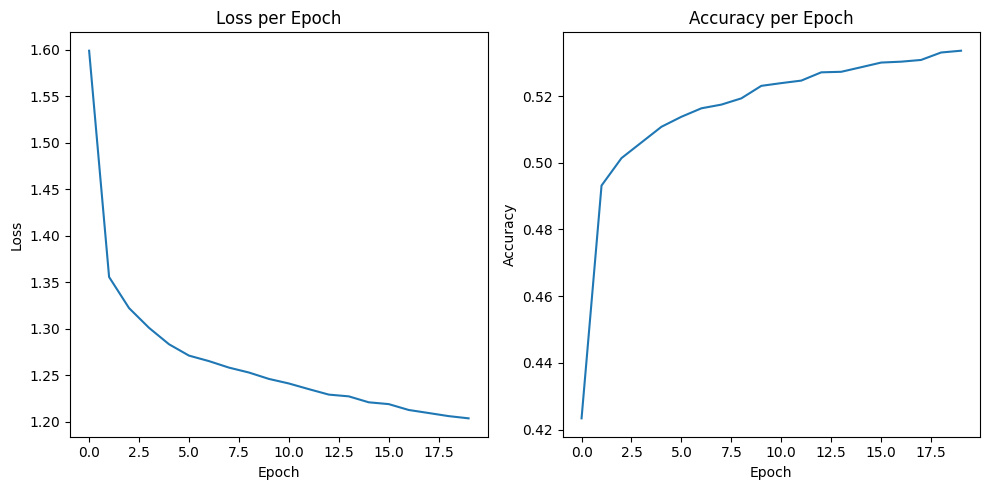

In [ ]:

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.plot(losses)
plt.title("Loss per Epoch")
plt.xlabel("Epoch")
plt.ylabel("Loss")

plt.subplot(1, 2, 2)
plt.plot(accuracies)
plt.title("Accuracy per Epoch")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")

plt.tight_layout()
plt.show()


Test Accuracy: 53.08%


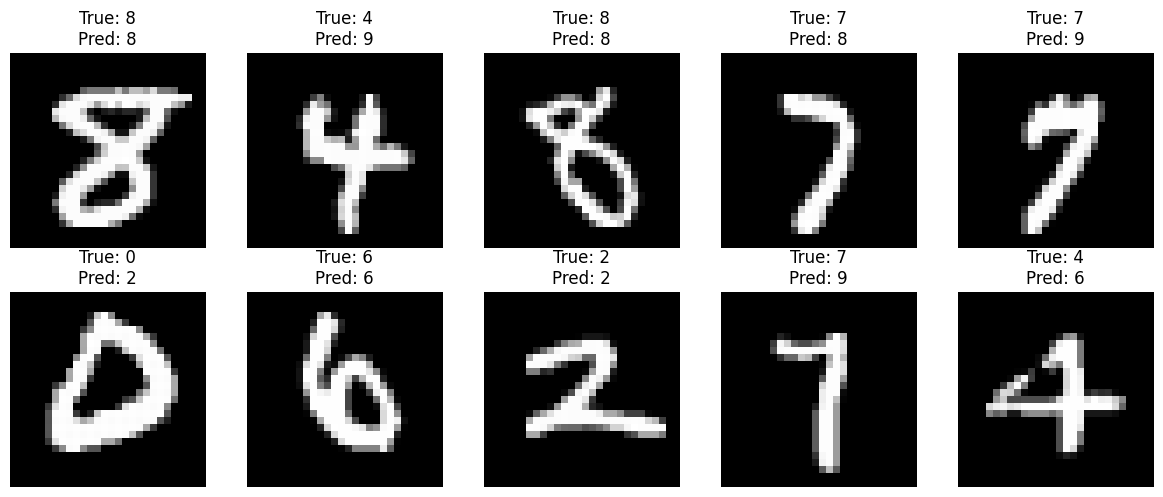

In [ ]:
import matplotlib.pyplot as plt
# Step 4: Evaluate accuracy on test set
test_accuracy = np.mean(predicted_labels == y_test.values)
print(f"\nTest Accuracy: {test_accuracy * 100:.2f}%")

plt.figure(figsize=(12, 5))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(X_test[i], cmap='gray')
    plt.title(f"True: {y_test.iloc[i]}\nPred: {predicted_labels[i]}")
    plt.axis('off')
plt.tight_layout()
plt.show()


In [ ]:
import matplotlib.pyplot as plt
def predict_rnn(x_seq):
    hs = {}
    hs[-1] = np.zeros((hidden_size, 1))
    for t in range(28):
        xt = x_seq[t].reshape(-1, 1)
        hs[t] = np.tanh(Wxh @ xt + Whh @ hs[t-1] + bh)
    y_pred = softmax(Why @ hs[27] + by)
    return np.argmax(y_pred)
predicted_labels = [predict_rnn(X_test[i]) for i in range(len(X_test))]
test_accuracy = np.mean(predicted_labels == y_test)
print(f"\nTest Accuracy: {test_accuracy * 100:.2f}%")


Test Accuracy: 53.08%
